#### Importing Packages 

In [44]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

from scipy.stats import zscore

In [38]:
df = pd.read_excel('Part2 - Company.xlsx','Sheet1',index_col=None)
df.to_csv('Company.csv', encoding='utf-8')
df.head()

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,NaN
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A


In [3]:
df.shape

(61, 5)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   A        61 non-null     int64 
 1   B        61 non-null     int64 
 2   C        61 non-null     int64 
 3   D        61 non-null     int64 
 4   Quality  43 non-null     object
dtypes: int64(4), object(1)
memory usage: 2.5+ KB


In [5]:
for i in df.columns:
    check = df[i].isnull().values.any()
    print(i,' - ', check)

A  -  False
B  -  False
C  -  False
D  -  False
Quality  -  True


In [6]:
df['Quality'].isnull().sum()

18

In [7]:
df1 = df[df['Quality'].notna()]
df1.head(10)

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A
6,34,28,78,22,Quality A
8,160,181,194,178,Quality B
10,76,94,107,37,Quality A
11,138,200,153,192,Quality B
12,27,106,57,37,Quality A
13,45,76,56,57,Quality A


In [8]:
df2 = df[df['Quality'].isna()]
df2

,A,B,C,D,Quality
2,159,163,135,131,NaN
5,153,140,154,199,NaN
7,191,144,143,154,NaN
9,145,178,158,141,NaN
14,186,142,146,174,NaN
18,167,171,163,191,NaN
23,171,185,181,183,NaN
27,193,169,199,155,NaN
29,29,49,6,35,NaN
32,161,138,143,139,NaN


In [9]:
df1['Quality'].isnull().sum()

0

In [10]:
df1.shape

(43, 5)

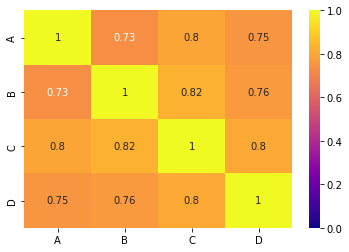

In [11]:
cor = df1.corr()
sns.heatmap(cor, annot=True, cmap='plasma', vmin = 0, vmax = 1);

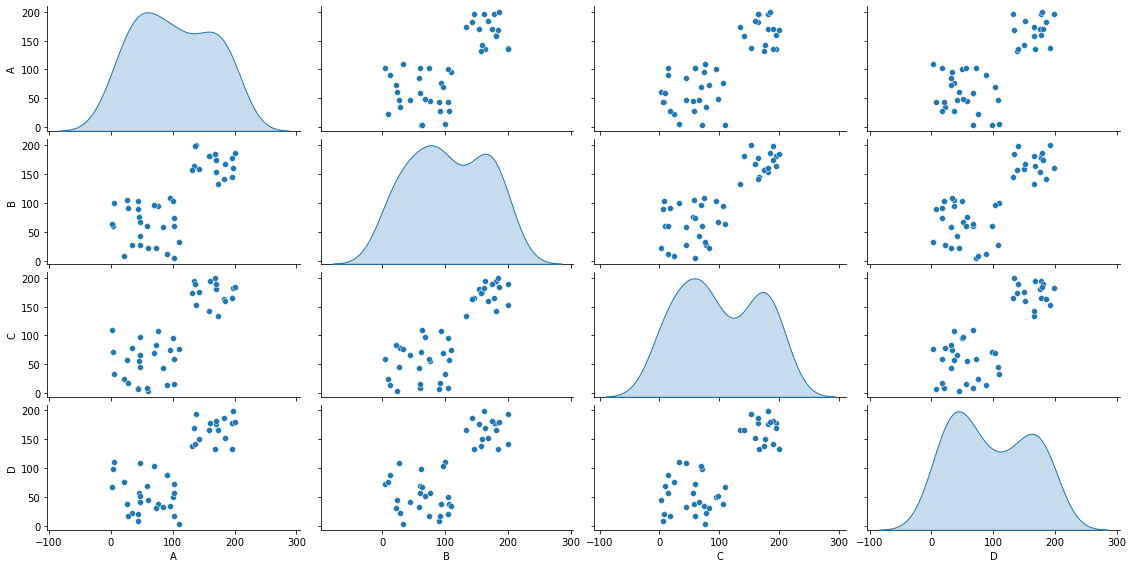

In [12]:
sns.pairplot(df1, height=2, aspect=2, diag_kind='kde');

Based on the pairplot I can infer that there is a positive linear correlation between both all the independent variables.
Also I can see that there is tow clusters in each of the bivariate comaprion. 

In [13]:
x = df1.drop(columns='Quality')
y = df1['Quality']

In [14]:
X = df2.drop(columns='Quality')
Y = df2['Quality']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=10)

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [17]:
from sklearn import metrics

from sklearn.linear_model import LogisticRegression

# Fit the model on train
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

#identifying intercept
coef_df = pd.DataFrame(model.coef_)
coef_df['intercept'] = model.intercept_
print(coef_df)

          0         1         2         3  intercept
0  0.985139  0.918838  0.974712  0.844689  -0.305584


In [37]:
model_score = model.score(x_test, y_test)
print(model_score)

1.0


In [20]:
X_train = X.to_numpy()

In [21]:
X_train

array([[159, 163, 135, 131],
       [153, 140, 154, 199],
       [191, 144, 143, 154],
       [145, 178, 158, 141],
       [186, 142, 146, 174],
       [167, 171, 163, 191],
       [171, 185, 181, 183],
       [193, 169, 199, 155],
       [ 29,  49,   6,  35],
       [161, 138, 143, 139],
       [181, 147, 174, 130],
       [179, 143, 189, 177],
       [197, 173, 165, 197],
       [188, 178, 175, 162],
       [137, 182, 165, 199],
       [ 88,  39,   9, 102],
       [180, 157, 192, 198],
       [157, 135, 135, 156]])

In [ ]:
x_train.type

In [22]:
model.fit(x_train, y_train)
#predict on test
Y_predict = model.predict(X_train)

In [23]:
Y_predict

array(['Quality B', 'Quality B', 'Quality B', 'Quality B', 'Quality B',
       'Quality B', 'Quality B', 'Quality B', 'Quality B', 'Quality B',
       'Quality B', 'Quality B', 'Quality B', 'Quality B', 'Quality B',
       'Quality B', 'Quality B', 'Quality B'], dtype=object)

In [24]:
df_pred = pd.DataFrame(Y_predict,columns=['Quality'])

In [27]:
df_pred

,Quality
0,Quality B
1,Quality B
2,Quality B
3,Quality B
4,Quality B
5,Quality B
6,Quality B
7,Quality B
8,Quality B
9,Quality B


In [39]:
df3 = df.replace(np.nan, 'Quality B')
df3.head(10)

,A,B,C,D,Quality
0,47,27,45,108,Quality A
1,174,133,134,166,Quality B
2,159,163,135,131,Quality B
3,61,23,3,44,Quality A
4,59,60,9,68,Quality A
5,153,140,154,199,Quality B
6,34,28,78,22,Quality A
7,191,144,143,154,Quality B
8,160,181,194,178,Quality B
9,145,178,158,141,Quality B


In [ ]:
x = df3.drop(columns='Quality')
y = df3['Quality']

In [40]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=10)

In [41]:
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)

In [42]:
model = LogisticRegression(solver="liblinear")
model.fit(x_train, y_train)
#predict on test
y_predict = model.predict(x_test)

In [43]:
model_score = model.score(x_test, y_test)
print(model_score)

1.0


End